# Exercise 2: Logistic regression

## Introduction
In this exercise, you will implement logistic regression
and apply it to two different datasets. Before starting on the programming exercise,
we strongly recommend watching the video lectures and completing the review questions
for the associated topics.

All the information you need for solving this assignment is in this notebook, and all the code you
will be implementing will take place within this notebook. 

In this part, you will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and
you want to determine each applicant's chance of admission based on their
results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training
example, you have the applicant's scores on two exams and the admissions
decision.
Your task is to build a classification model that estimates an applicant's
probability of admission based the scores from those two exams.

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

### Visualizing the data
Before starting to implement any learning algorithm, it is always good to
visualize the data if possible.

In [2]:
data = pd.read_csv("ex2data1.txt", header = None, names = ["Exam 1", "Exam 2", "Admission"])
X = data.iloc[:,:-1] 
y = data.iloc[:,2]
data.head(n = 8)

,Exam 1,Exam 2,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1


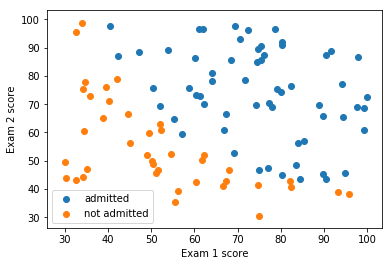

In [3]:
pos = y == 1
neg = y == 0
adm = plt.scatter(X[pos].values[:,0], X[pos].values[:,1])
not_adm = plt.scatter(X[neg].values[:,0], X[neg].values[:,1])
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend((adm, not_adm), ("admitted", "not admitted"))
plt.show()

In [4]:
# sigmoid function
def sigmoid(x):
    '''sigmoid function in vectorized code'''
    s_x = 1 / (1 + np.exp(-x))
    
    return s_x

In [5]:
# cost function
def costFunction(theta, X, y):
    '''computes cost of learning function for given theta parameters'''
    
    J = (-1/m) * np.sum(np.multiply(y, np.log(sigmoid(X @ theta))) 
        + np.multiply((1-y), np.log(1 - sigmoid(X @ theta))))
    return J

In [6]:
# gradient of cost function
def gradient(theta, X, y):
    '''gradient of cost function'''
     
    return ((1/m) * X.T @ (sigmoid(X @ theta) - y))

In [7]:
(m, n) = X.shape
X = np.hstack((np.ones((m, 1)), X))
y = y[:, np.newaxis]
theta = np.zeros((n + 1, 1))

J = costFunction(theta, X, y)
print("Cost fo theta parameters", theta.flatten(), " is ", J)

Cost fo theta parameters [ 0.  0.  0.]  is  0.69314718056


In [8]:
grad = gradient(theta, X, y)
print("Gradient of theta ", theta.flatten(), "is", grad.flatten())

Gradient of theta  [ 0.  0.  0.] is [ -0.1        -12.00921659 -11.26284221]


In [9]:
# optimize cost function with Newton Conjugate-Gradient algorithm
opt_cost = opt.fmin_tnc(func=costFunction, x0=theta.flatten(), fprime=gradient,
                       args=(X, y.flatten()))
# solution is in first element of ndarray 
opt_theta = opt_cost[0] 
print("Optimized theta parameters are ", opt_theta)

Optimized theta parameters are  [-25.16131859   0.20623159   0.20147149]


In [10]:
J_opt = costFunction(opt_theta[:,np.newaxis], X, y)
print("Cost for optimized theta parameters is ", J_opt)

Cost for optimized theta parameters is  0.203497701589


In [11]:
# predict if student with exam scores 45 and 85 will be admitted
pred_score = sigmoid(np.array([1, 45, 85]).T.dot(opt_theta))
print("Student with exam scores 45 and 85 has {:.2f}% chance of being admitted. ".format(pred_score * 100))


Student with exam scores 45 and 85 has 77.63% chance of being admitted. 


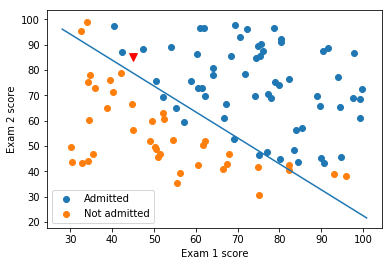

In [12]:
# points for regression line
plot_x = [np.min(X[:,1]-2), np.max(X[:,2]+2)]
plot_y = -1/opt_theta[2]*(opt_theta[0] 
          + np.dot(opt_theta[1],plot_x))

# plot point of student with exam score 45 and 85
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')

# data points
pos = y.flatten() == 1
neg = y.flatten() == 0
adm = plt.scatter(X[pos][:,1], X[pos][:,2])
not_adm = plt.scatter(X[neg][:,1], X[neg][:,2])
decision_boun = plt.plot(plot_x, plot_y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()

In [13]:
def accuracy(X, y, theta, cutoff):
    '''computes accuracy of training model'''
    pred = [sigmoid(np.dot(X, theta)) >= cutoff]
    acc = np.mean(pred == y)
    return acc

predict = accuracy(X, y.flatten(), opt_theta, 0.5)
print("Our learning function predicts {:.1f}% of training data correctly.".format(predict * 100))

Our learning function predicts 89.0% of training data correctly.


## Regularized logistic regression

In this part of the exercise, you will implement regularized logistic regression
to predict whether microchips from a fabrication plant passes quality assur-
ance (QA). During QA, each microchip goes through various tests to ensure
it is functioning correctly.
Suppose you are the product manager of the factory and you have the
test results for some microchips on two dierent tests. From these two tests,
you would like to determine whether the microchips should be accepted or
rejected. To help you make the decision, you have a dataset of test results
on past microchips, from which you can build a logistic regression model.

### Visualizing data

In [14]:
data2 = pd.read_csv("ex2data2.txt", header=None, names=["Test1", "Test2", "Quality"])
X2 = data2.iloc[:,:-1]
y2 = data2.iloc[:,2]
data2.head(n=8)

,Test1,Test2,Quality
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
5,-0.524770,0.209800,1
6,-0.398040,0.034357,1
7,-0.305880,-0.192250,1


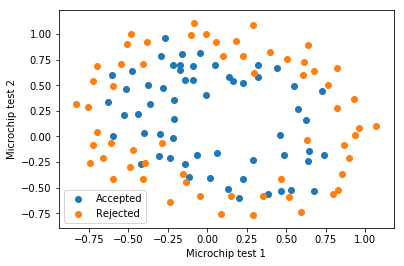

In [15]:
pos = y2==1
neg = y2==0
accepted = plt.scatter(X2[pos].values[:,0], X2[pos].values[:,1])
rejected = plt.scatter(X2[neg].values[:,0], X2[neg].values[:,1])
plt.xlabel("Microchip test 1")
plt.ylabel("Microchip test 2")
plt.legend((accepted, rejected), ("Accepted", "Rejected"))
plt.show()

Plot of training data shows that our dataset cannot be separated into positive and
negative examples by a straight-line through the plot. Therefore, a straight-
forward application of logistic regression will not perform well on this dataset
since logistic regression will only be able to find a linear decision boundary.
One way to fit the data better is to create more features from each data
point. For better decision boundary we will map the features of all polynomial terms of x1 and x2 up to the sixth power.

### Feature mapping

In [16]:
def featureMap(X_1, X_2, degree):
    '''feature mapping function'''
    
    X_map = np.ones((X_1.shape[0], 1))
    
    for i in range(1, degree + 1):
        for j in range(i + 1):
            X_map = np.hstack((X_map, np.multiply(np.power(X_1, i - j), np.power(X_2, j))
                              [:,np.newaxis]))
            
    return X_map

In [17]:
X2 = featureMap(X2.iloc[:,0], X2.iloc[:,1], degree=6)

In [19]:
print("New shape of feature data is ", X2.shape)

New shape of feature data is  (118, 28)


In [20]:
# cost function for regularized logistic regression
def regCost(theta, X, y, lambda_r):
    
    m = len(y)
    J_theta = (-1/m) * (y.T @ np.log(sigmoid(X @ theta)) + (1 - y.T) @ np.log(1 - sigmoid(X @ theta)))
    # regulize all theta parameters except theta 0 
    reg = (lambda_r / (2*m)) * (theta[1:].T @ theta[1:]) 
    J_theta = J_theta + reg
    
    return J_theta

In [21]:
# gradient of cost function for regularized logistic regression
def regGrad(theta, X, y, lambda_r):
    
    m = len(y)
    grad = np.zeros([m, 1])
    grad = (1/m) * X.T @ (sigmoid(X @ theta) - y)
    grad[1:] = grad[1:] + (lambda_r/m) * theta[1:]
    
    return grad

In [22]:
(m, n) = X2.shape
y2 = y2[:, np.newaxis]
theta_r = np.zeros((n , 1))
lambda_r = 1

J_r = regCost(theta_r, X2, y2, lambda_r)
print("Cost of theta parameters", theta_r.flatten(), " is ", J_r[0])

Cost of theta parameters [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]  is  [ 0.69314718]


In [23]:
optimize = opt.fmin_tnc(func=regCost, x0=theta_r.flatten(), fprime=regGrad,
                        args=(X2, y2.flatten(), lambda_r))
opt_theta_r = optimize[0]
print("Optimized theta parameters are ", opt_theta_r)

Optimized theta parameters are  [ 1.27271028  0.62529966  1.18111687 -2.01987399 -0.9174319  -1.43166932
  0.12393226 -0.36553117 -0.35725403 -0.17516291 -1.4581701  -0.05098418
 -0.61558548 -0.27469165 -1.19271296 -0.24217841 -0.20603293 -0.04466179
 -0.27778955 -0.29539513 -0.45645982 -1.04319157  0.02779373 -0.29244876
  0.01555762 -0.32742407 -0.14389151 -0.92467486]


In [24]:
predict_r = accuracy(X2, y2.flatten(), opt_theta_r, 0.5)
print("Our learning function predicts {:.1f}% of training data correctly.".format(predict_r * 100))

Our learning function predicts 83.1% of training data correctly.


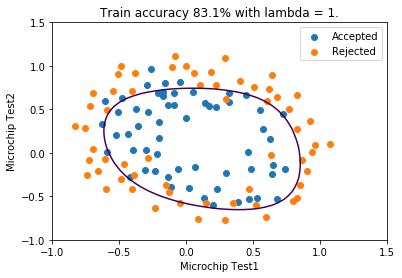

In [31]:
# plot of decision boundary

u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))

def mapFeatureForPlotting(X1, X2):
    degree = 6
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))))
    return out

for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapFeatureForPlotting(u[i], v[j]), opt_theta_r)
        
pos = y2.flatten() == 1
neg = y2.flatten() == 0
X_plot = data2.iloc[:,:-1]
accepted_plot = plt.scatter(X_plot[pos].values[:,0], X_plot[pos].values[:,1])
rejected_plot = plt.scatter(X_plot[neg].values[:,0], X_plot[neg].values[:,1])
plt.contour(u,v,z,0)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend((accepted_plot, rejected_plot), ('Accepted', 'Rejected'))
plt.title("Train accuracy {:.1f}% with lambda = {}.".format(predict_r*100, 1))
plt.show()